In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
#1a.import the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import poisson
df=pd.read_csv('Aerofit.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
#1b.chec the basic struture of the dataset
len(df)

180

In [ ]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
#Once importing check the rows and columns count
df.shape

(180, 9)

In [ ]:
#getting the data types of all attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
Age_copy         0
dtype: int64

In [ ]:
#7.Customer Profiling-get the age colunm to categorize it
df['Age'].min(), df['Age'].max()

(18, 50)

In [ ]:
df['Age_copy']=df['Age']
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_copy
0,KP281,18,Male,14,Single,3,4,29562,112,18
1,KP281,19,Male,15,Single,2,3,31836,75,19
2,KP281,19,Female,14,Partnered,4,3,30699,66,19
3,KP281,19,Male,12,Single,3,3,32973,85,19
4,KP281,20,Male,13,Partnered,4,2,35247,47,20


In [ ]:
#df.drop(['KP781'],axis=1,inplace=True)

In [ ]:
age_bins=[17,25,39,50]
age_lables = ['young-age','adults','middle-aged']
df['Age_copy'] = pd.cut(df['Age_copy'], bins=age_bins, labels = age_lables)
df.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_copy
0,KP281,18,Male,14,Single,3,4,29562,112,young-age
1,KP281,19,Male,15,Single,2,3,31836,75,young-age
2,KP281,19,Female,14,Partnered,4,3,30699,66,young-age
3,KP281,19,Male,12,Single,3,3,32973,85,young-age
4,KP281,20,Male,13,Partnered,4,2,35247,47,young-age


In [ ]:
df['Age_copy'].unique()

['young-age', 'adults', 'middle-aged']
Categories (3, object): ['young-age' < 'adults' < 'middle-aged']

In [ ]:
#check for any duplicates
df.duplicated().sum()

0

In [ ]:
df['Fitness'].describe()

count    180.000000
mean       3.311111
std        0.958869
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Fitness, dtype: float64

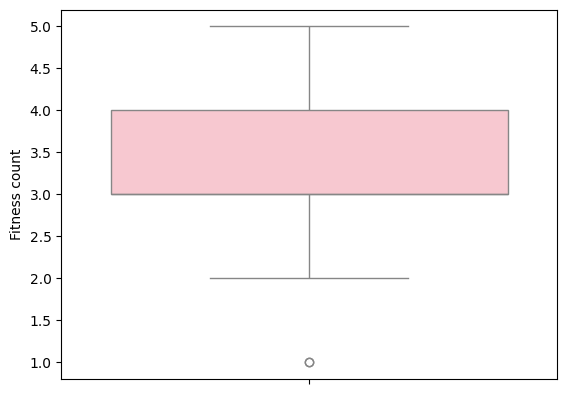

In [ ]:
#2ato check the what is the fitness level of coustomers and who are outliers
sns.boxplot(y=df["Fitness"],color='pink')
plt.ylabel('Fitness count')
plt.show()

From the above chart we can see,the 50% of the cutomers are in average fitness ,few customers are the actual fitness freaks and we can see only one customers is having low fitness

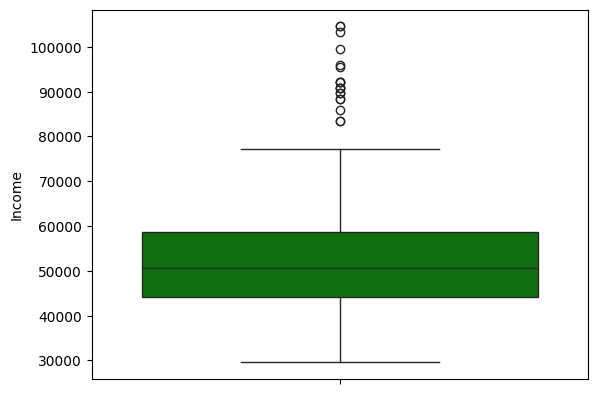

In [ ]:
#2b.to check the what is the income of the coustomers and who are outliers
sns.boxplot(y=df["Income"],color='green')
plt.ylabel('Income')
plt.show()

From the above graph,we can get 50% of the customer are getting the salary between 40000 and 60000

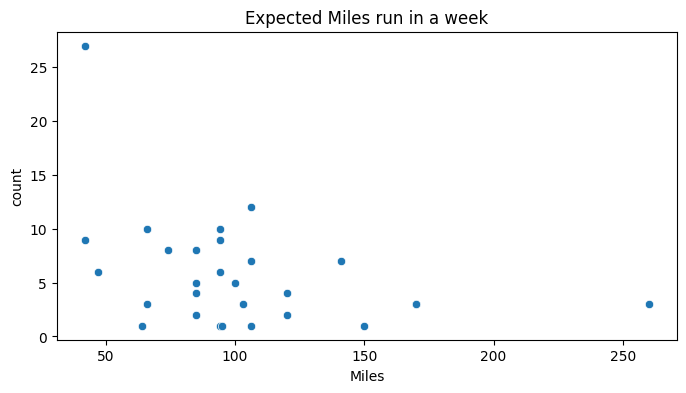

In [ ]:
#How filtness customers expect to run every week

plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='Miles', y=df['Miles'].value_counts())
plt.title('Expected Miles run in a week')
plt.ylabel("count")
plt.xlabel("Miles")
plt.show()

In [ ]:
#3.Check if features like marital status, age have any effect on the product purchased

In [ ]:
df['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

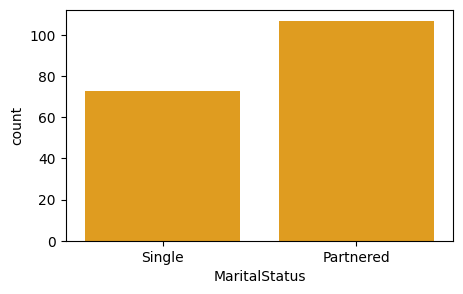

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x='MaritalStatus',data=df,color='orange')
plt.show()

We have good counts in both Partnered and single customers,but partenered are little more that single

In [ ]:
df_mar = df.groupby(['MaritalStatus','Age_copy'])[['Age_copy']].count()
df_mar

Age_copy
MaritalStatus Age_copy             
Partnered     young-age          40
              adults             55
              middle-aged        12
Single        young-age          39
              adults             29
              middle-aged         5

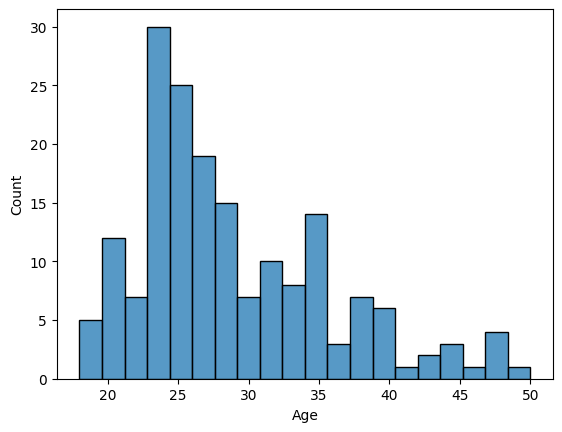

In [ ]:
#age distribution
sns.histplot(data=df, x= "Age", bins=20)
plt.show()

Most of the customers are between the age 25 to 30

<Axes: xlabel='MaritalStatus', ylabel='count'>

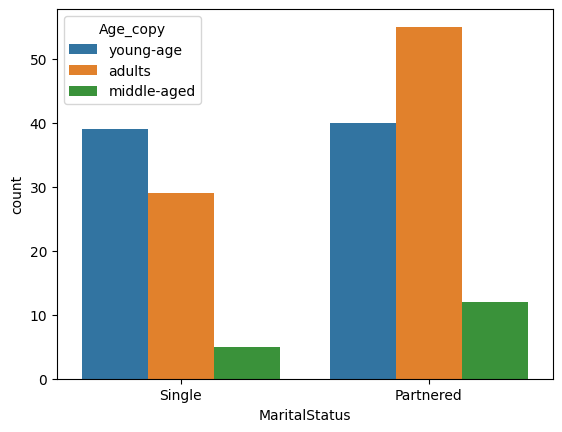

In [ ]:
sns.countplot(data=df, x='MaritalStatus', hue='Age_copy')

From the above plot we can say patnered with adults age(between 25 to 39) are the most number of customers.And irrespective of matrial status we have less customers in middle age

In [ ]:
#4.what percent of customers have purchased KP281, KP481, or KP781

In [ ]:
#8a.calculating marginal probablity of each product
pd.crosstab(index=df['Product'],
            columns=df['Product'],
            margins=True,
            normalize='columns')

Product,KP281,KP481,KP781,All
Product,,,,
KP281,1.0,0.0,0.0,0.444444
KP481,0.0,1.0,0.0,0.333333
KP781,0.0,0.0,1.0,0.222222


8a.from the above table,we can see the **marginal probability** of each product KP281=0.4444,  KP481=0.3333,  KP781=0.222

In [ ]:
#KP281 purchase percentage
round(80*100/180,2)

44.44

KP281 having the higher purchase percentage

In [ ]:
#KP481 purchase percentage
round(60*100/180,2)

33.33

In [ ]:
#KP781 purchase percentage
round(40*100/180,2)

22.22

In [ ]:
#8b.calculating the probability of product given gender
pd.crosstab(index=df['Product'],
            columns=df['Gender'],
            margins=True,
            normalize='columns')

Gender,Female,Male,All
Product,,,
KP281,0.526316,0.384615,0.444444
KP481,0.381579,0.298077,0.333333
KP781,0.092105,0.317308,0.222222


female customer purchased more KP281 product that male below the conditional probability of each product purchase given gender

P(KP281/Female)=0.526316

P(KP281/male)=0.384615

P(KP481/Female)=0.381579

P(KP481/male)=0.298077

P(KP781/Female)=0.092105

P(KP781/male)=0.317308(probability of male customers purchasing KP781)

In [ ]:
pd.crosstab(index=df['Product'],
            columns=df['Age_copy'],
            margins=True,
            normalize='columns')

Age_copy,young-age,adults,middle-aged,All
Product,,,,
KP281,0.43038,0.464286,0.411765,0.444444
KP481,0.35443,0.321429,0.294118,0.333333
KP781,0.21519,0.214286,0.294118,0.222222


 P(KP281/middle-aged)=0.0.294118(probability of middle-aged customers purchasing KP781 is hight )










In [ ]:
#heatmap to find the corellation between Age,fitness and miles
dfagefit=df[['Age', 'Fitness','Miles']]
dfagefit.head()

,Age,Fitness,Miles
0,18,4,112
1,19,3,75
2,19,3,66
3,19,3,85
4,20,2,47


In [ ]:
dfagefit.corr()

,Age,Fitness,Miles
Age,1.000000,0.061105,0.036618
Fitness,0.061105,1.000000,0.785702
Miles,0.036618,0.785702,1.000000


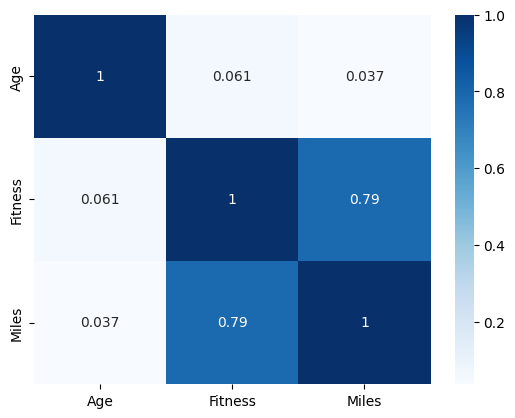

In [ ]:
sns.heatmap(dfagefit.corr(), cmap= "Blues", annot=True)
plt.show()

In [ ]:
df['Income_copy']=df['Income']
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_copy,Income_copy
0,KP281,18,Male,14,Single,3,4,29562,112,young-age,29562
1,KP281,19,Male,15,Single,2,3,31836,75,young-age,31836
2,KP281,19,Female,14,Partnered,4,3,30699,66,young-age,30699
3,KP281,19,Male,12,Single,3,3,32973,85,young-age,32973
4,KP281,20,Male,13,Partnered,4,2,35247,47,young-age,35247


In [ ]:
#analysis the income and purchase of products
df['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

In [ ]:
income_bins=[29000,41000,70000,99000]
income_lables = ['low','Average','high']
df['Income_copy'] = pd.cut(df['Income_copy'], bins=income_bins, labels = income_lables)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_copy,Income_copy
0,KP281,18,Male,14,Single,3,4,29562,112,young-age,low
1,KP281,19,Male,15,Single,2,3,31836,75,young-age,low
2,KP281,19,Female,14,Partnered,4,3,30699,66,young-age,low
3,KP281,19,Male,12,Single,3,3,32973,85,young-age,low
4,KP281,20,Male,13,Partnered,4,2,35247,47,young-age,low


<Axes: xlabel='Product', ylabel='count'>

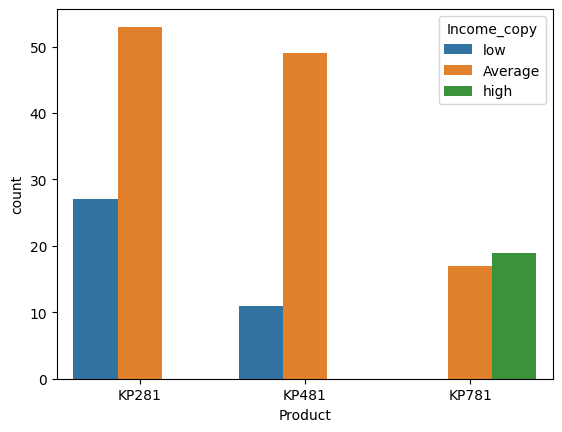

In [ ]:
sns.countplot(data=df, x='Product', hue='Income_copy')

From the above comparison of income and product purchase,customer with hight income purchase KP781 product,and customer average salary purchase both KP281 and KP481 product

# Insights


1.   patnered with adults age(between 25 to 39) are the most number of customers.And irrespective of matrial status we have less customers in middle age
2.   Most of the customers are between the age 25 to 30

1.  50% of the cutomers are in average fitness ,few customers are the actual fitness freaks and we can see only one customers is having low fitness
2.   we can get 50% of the customer are getting the salary between 40000 and 60000

1.   We have good counts in both Partnered and single customers,but partenered are little more that single








# Recommendation
1.We can increase the manufacture of this treadmill product KP281,since majaority of womem have the possiblity to buy this.



2.KP781 product is mostly puchased by the male and middle-aged customers



3.patnered with adults age(between 25 to 39) are the most number of customers.And irrespective of matrial status we have less customers in middle age


4.Most of the customers are between the age 25 to 30


5.comparison of income and product purchase,customer with hight income purchase KP781 product,and customer average salary purchase both KP281 and KP481 product,so we can manufacture more KP281 and KP481 treadmills